# Trabalho Final Ciência de Dados - Análise e Pré-Processamento de Dados com o Dataset Olist E-Commerce

## Importações

In [1]:
# Importações necessárias para todo o projeto!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


## Conexão com o Google Drive, carregando datasets e fazendo Merge

In [2]:
# Configurando a conexão com o Google Drive

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path = "/content/drive/MyDrive/Trabalho Final Dataset Original/"

Mounted at /content/drive


In [3]:
# Carregando os datasets a serem usados no projeto

df_order_items = pd.read_csv(path + "olist_order_items_dataset.csv")
df_orders = pd.read_csv(path + "olist_orders_dataset.csv")
df_products = pd.read_csv(path + "olist_products_dataset.csv")

In [4]:
# Juntando os datasets com um merge para melhor análise

df = df_order_items.merge(df_orders, on="order_id", how="left")
df = df.merge(df_products, on="product_id", how="left")

# A primeira linha pega a tabela order items e junta com orders, o tipo de junção é LEFT. Mantém todas as linhas de order_items e trás informações de order SEEEEE EXISTIREM
# A segunda linha faz com que, junte no dataframe da linha anterior, a tabela produtos, usando também LEFT. MANTENDO TODOS OS ITENS VENDIDOS e trazendo informações do produto APENAS se existir no catalogo do produto
# Isso vai poupar tempo na hora de tratar nulos

## Exploração Inicial

In [5]:
# Mostrando as respectivas colunas de cada uma das tabelas
print(df_orders.columns)
print(df_order_items.columns)
print(df_products.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [6]:
# Mostrando as 5 primeiras linhas do dataset já unificado, assim podemos verificar se está tudo certo até aqui
# Buscamos conferir principalmente se o Merge deu certo
print("Primeiras 5 linhas: ")
print("\n")
df.head()

Primeiras 5 linhas: 




,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [7]:
# Mostrar as informações gerais sobre o dataframe:
print("Informações gerais sobre o dataframe: ")
print("\n")
df.info()

Informações gerais sobre o dataframe: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  ob

Já podemos perceber que algumas colunas deveriam estar em outro formato, como por exemplo: order_purchase_timestamp,order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, shipping_limit_date.

Essas colunas deveriam estar como datetime. Temos outras colunas que deveriam estar em formatos diferentes, vamos concertar tudo isso na seção de conversão e padronização de tipos

In [8]:
# Mostrar informações descritivas sobre o dataframe:
print("Informações descritivas sobre o dataframe: ")
print("\n")
df.describe()

Informações descritivas sobre o dataframe: 




,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


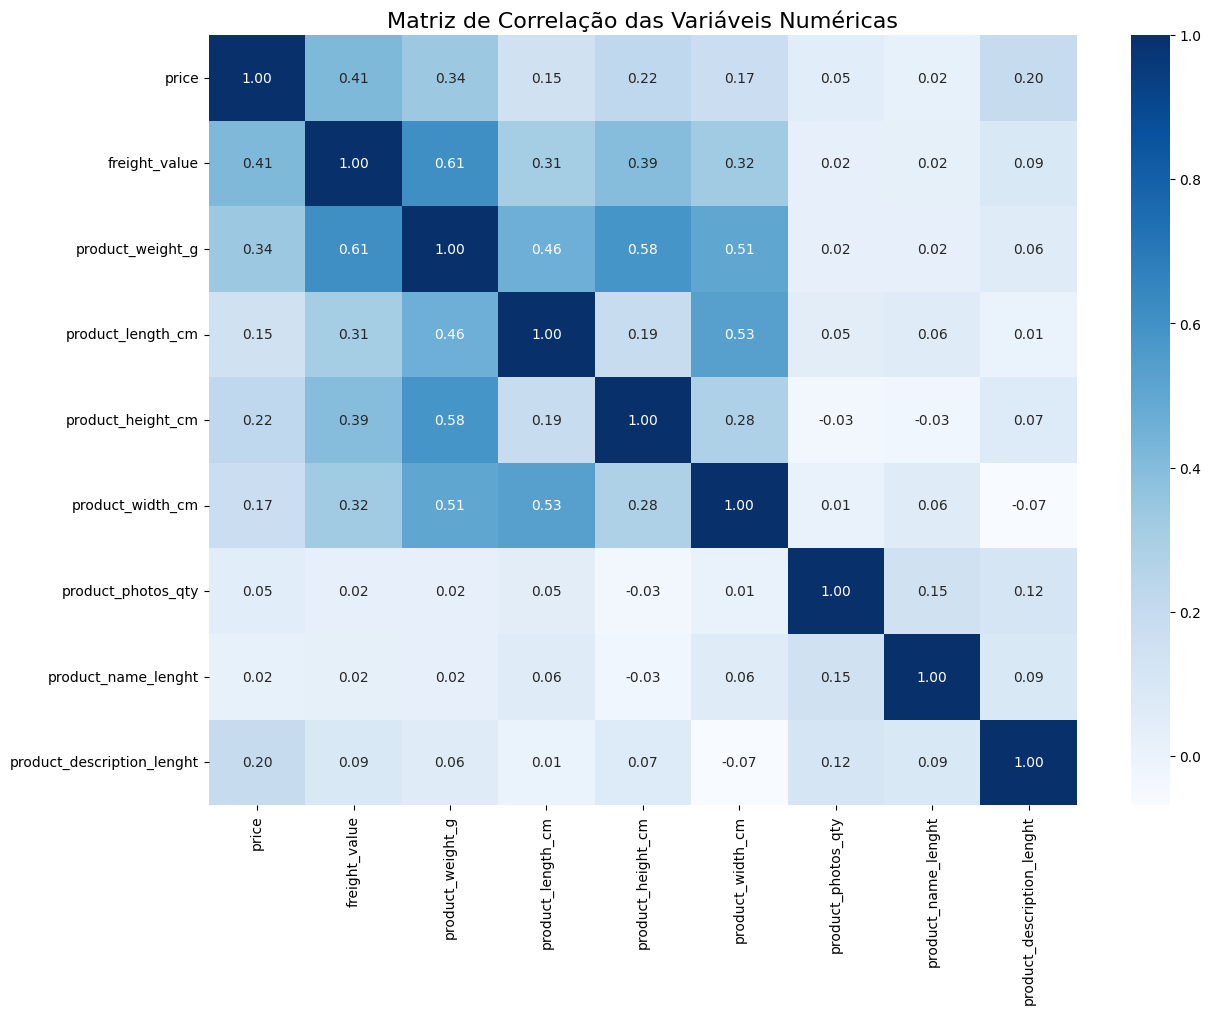

In [9]:
# Heatmap para ver as correlações
colunas = [
    "price",
    "freight_value",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "product_photos_qty",
    "product_name_lenght",
    "product_description_lenght"
]

corr_matrix = df[colunas].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()

Com esse heatmap percebemos que o peso tem correlaçao com o frete do produto, o que normalmente acontece na maioria das lojas virtuais.

## Limpeza dos Dados

### Nulos

In [10]:
# Verificar valores nulos

print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64


Na coluna "product_name_lenght", "product_photos_qty" e "product_description_name" será colocado com valor 0, porque mais pra frente no trabalho vai convertido o tipo para INT, porque quando se tem valores NaN o Dtype sempre volta como object, pra fazer a conversão imputamos NAN como 0;

Na coluna product_category_name, valores nulos será colocado "Desconhecido" pra ter uma maneira de nomear esses valores nulos.

In [11]:
# Colunas com nulos serão colocado valor 0
colunas = [
    "product_photos_qty",
    "product_name_lenght",
    "product_description_lenght"
    ]

for col in colunas:
  df[col] = df[col].fillna(0)


 # Coluna com nulos será colocado "Desconhecido"
df["product_category_name"] = df["product_category_name"].fillna("Desconhecido")

print("Modificações feitas com sucesso!")
print("")
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Modificações feitas com sucesso!

Valores ausentes por coluna:
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64


Depois, vamos pegar as colunas "product_weight_g","product_length_cm", "product_height_cm", "product_width_cm", onde for nulo vamos fazer a mediana da categoria para substituir, pois mediana é menos afetada por outliers.

In [12]:
colunas = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in colunas:
  df[col] = df[col].fillna(df.groupby("product_category_name")[col].transform("median"))

print("Modificações feitas com sucesso!")
print("")

print("Valores ausentes por coluna:")
print(df.isnull().sum())

Modificações feitas com sucesso!

Valores ausentes por coluna:
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
dtype: int64


Não vamos inputar valores nos nulos de data ainda, pois na conversão os valores ausentes vão virar NaT

### Duplicatas

A maioria das colunas pode ter duplicatas sem nenhum problema, com exeção da junção de duas, order_id e order_item_id

In [13]:
# LINHAS DUPLICADAS
duplicated_rows = df[df.duplicated()]

# Quais linhas "order_id" E "order_item_id"  estão repetidas
duplicated_on_subset= df[df.duplicated(subset=["order_id","order_item_id"])]

print("Linhas duplicadas:")
print("")
print(duplicated_rows)

print("\n\n")

print('Linhas com "order_id", "order_item_id" estão duplicadas:')
print("")
print(duplicated_on_subset)

Linhas duplicadas:

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []

[0 rows x 22 columns]



Linhas com "order_id", "order_item_id" estão duplicadas:

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_wi

Mas, como resultado, não temos nenhuma linha duplicadas!

### Inconsistências

Agora vamos verificar as inconsistência, olhando o df.describe, vemos que algumas coisas tem peso 0, então buscaremos além dessa categoria, se existem valores 0 ou negativos em:  

Price, pois não podemos ter preços negativos ou zerados;

Freight_value, pois não podemos ter fretes negativos, mas podemos sim ter fretes zerados;

Product_weight_g pois não podemos ter peso negativos nem zerados.


In [14]:
# Print para ver as inconsistências nessas colunas:
print("Inconsistências na coluna Preço <= 0 -->", (df['price'] <= 0).sum())
print("Inconsistências na coluna Frete < 0 -->", (df['freight_value'] < 0).sum())
print("Inconsistências na coluna Peso <= 0 -->", (df['product_weight_g'] == 0).sum())

Inconsistências na coluna Preço <= 0 --> 0
Inconsistências na coluna Frete < 0 --> 0
Inconsistências na coluna Peso <= 0 --> 8


Encontramos 8 valores inconsistentes, precisamos tratar eles pois podem prejudicar futuras análises.

In [15]:
# Tratar valores de peso do produto, com peso menor ou igual a zero.

df.loc[df["product_weight_g"] <= 0, "product_weight_g"] = (
    df.groupby("product_category_name")["product_weight_g"].transform("median")
)

print("Peso <= 0 -->", (df['product_weight_g'] == 0).sum())

Peso <= 0 --> 0


Usamos mediana para tratar os valores inconsistentes nos pesos do produto pois mediana não é distorcida por outliers.

Depois vamos tratar possiveis inconsistencias por mapeamento no nome da categoria

In [16]:
# Transformar tudo em caixa baixa e tirar os espaços vazios.
df['product_category_name'] = (df['product_category_name'].str.lower().str.strip())

### Outliers

Agora vamos explorar os outliers:

In [17]:
# Print para ver os valores dos outliers das colunas preço, valor do frete e peso do produto:
colunas = [
    "price",
    "freight_value",
    "product_weight_g",
]

for col in colunas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    porcentagem = (outliers / len(df)) * 100

    print(f"{col} -> {outliers} outliers")
    print(f"{col} -> {porcentagem:.2f}% são outliers\n")

price -> 8427 outliers
price -> 7.48% são outliers

freight_value -> 12134 outliers
freight_value -> 10.77% são outliers

product_weight_g -> 15807 outliers
product_weight_g -> 14.03% são outliers



Gráfico para melhor visualização gráfica dos números e porcentagens vistos acima

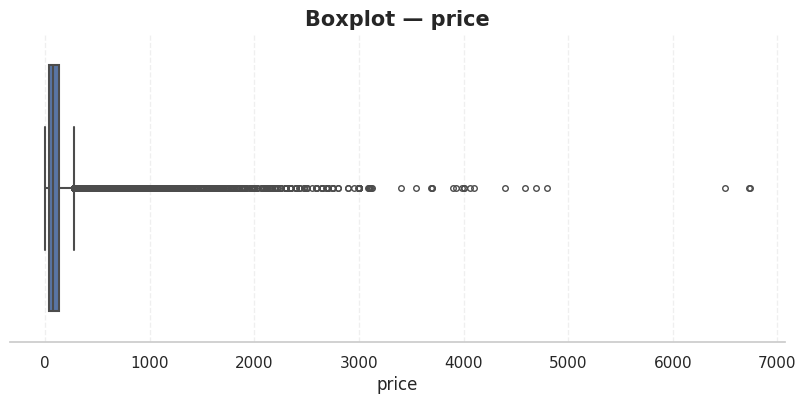

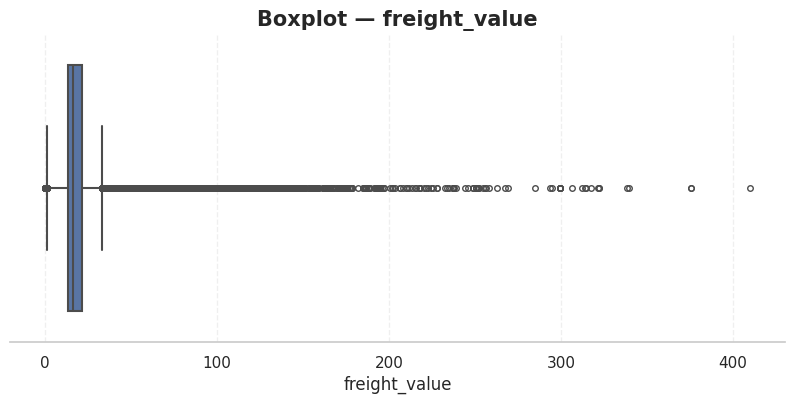

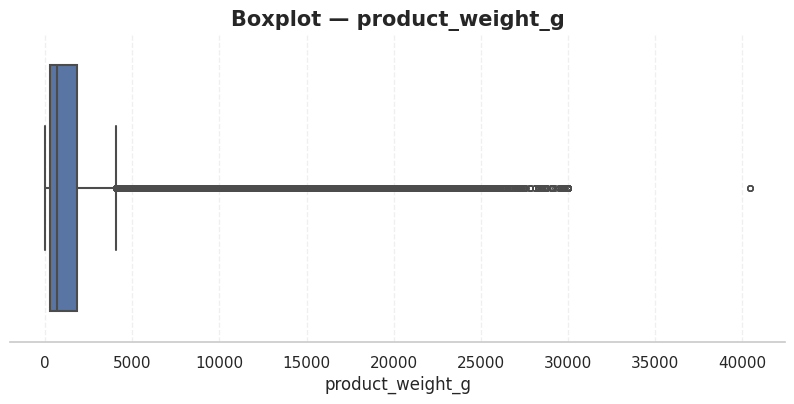

In [18]:
sns.set(style="whitegrid")

for col in colunas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color="#4C72B0", linewidth=1.5, fliersize=4)
    plt.title(f"Boxplot — {col}", fontsize=15, fontweight="bold")
    plt.xlabel(col)
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    sns.despine(left=True)
    plt.show()

Decidimos não mexer nos outliers, porque vamos trabalhar com os valores reais, optamos por retira apenas as medidas irreais, tipo peso irreal.

Agora vamos modificar as colunas de tamanho, largura e comprimento, que possuem valor 0 pois eles destoam do valor, já que fizemos o tratamento dos nulos anteriormente.

Esses valores zerados não são nulos, eles já estavam com zero antes, por isso não tratamos na aba de nulos



In [19]:
# Substituir valores <= 0 pela mediana da categoria

colunas = [
    "product_height_cm",
    "product_length_cm",
    "product_width_cm"
]

for col in colunas:
    df.loc[df[col] <= 0, col] = (
        df.groupby("product_category_name")[col].transform("median")
    )


for col in colunas:
    print(f"{col} -> {(df[col] <= 0).sum()} Valores igual ou menores que 0 restantes")

product_height_cm -> 0 Valores igual ou menores que 0 restantes
product_length_cm -> 0 Valores igual ou menores que 0 restantes
product_width_cm -> 0 Valores igual ou menores que 0 restantes


## Conversão e padronização de tipos

Agora vamos converter e padronizar os tipos.


Identificamos que as seguintes colunas precisam ser convertidas: Todas as que tem data, product_description_lenght, product_photos_qty, product_name_lenght.

Temos que converter porque se as que são data continuarem como string não poderemos calcular diferença entre datas nem realizar outras operações.


product_description_lenght, product_photos_qty, product_name_lenght foram convertidos para int64 pois representam valores numéricos, se ficarem como float ou object, não conseguiriamos fazer análises estatisticas ou costruir gráficos corretamente.

In [20]:
# Converter para Datatime
colunas = [
    "shipping_limit_date",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in colunas:
    df[col] = pd.to_datetime(df[col], errors="coerce")


print("Modificações feitas com sucesso")

print(df.info())

Modificações feitas com sucesso
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              11263

In [21]:
# Converter de Object e float64 para int64
colunas = [
    "product_description_lenght",
    "product_photos_qty",
    "product_name_lenght"
]

for col in colunas:
  df[col] = df[col].fillna(0)
  df[col] = df[col].astype(np.int64)


print("Modificações feitas com sucesso!")

print(df.info())

Modificações feitas com sucesso!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              1126

## Codificação de dados categóricos

Aplicamos apenas no order_status do pedido, porque além de ter poucas categorias, serve pra gerar valores entre 0 e 1.


Temos que fazer isso porque o computador não entende texto tipo "shipped", mas entende valores entre 0 e 1!

In [22]:
# Para codificar os dados, transformando o que é texto em coluna numérica.

df = pd.get_dummies(df, columns=["order_status"], drop_first=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   order_approved_at              112635 non-null  datetime64[ns]
 10  order_delivered_carrier_date   111456 non-null  datetime64[ns]
 11  

## Feature Engineering

Decidimos criar quatro features essenciais relacionadas à logistica, atraso e custos, que julgamos estarem mais relacionados aos padrões que tema do projeto pede

### Feature 1 - Delivery_delay_days Para calcular quantidade de dias atrasado


In [23]:
# Calculo de quantos dias atrasou (Se o valor for positivo significa que atrasou!)
df["delivery_delay_days"] = (
    df["order_delivered_customer_date"] -
    df["order_estimated_delivery_date"]
).dt.days

# O tipo de algumas está em float porque existem valores nulos NaT (Pois colocamos datetime)
print(df.info())
print("")
print("")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   order_approved_at              112635 non-null  datetime64[ns]
 10  order_delivered_carrier_date   111456 non-null  datetime64[ns]
 11  

### Feature 2 - is_late_delivery Para saber se a encomenda está atrasada ou não

In [24]:
# Coluna convertida para numérica, pra melhorar gráficos e matrizes de correlação
df["is_late_delivery"] = (df["delivery_delay_days"] > 0).astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   order_approved_at              112635 non-null  datetime64[ns]
 10  order_delivered_carrier_date   111456 non-null  datetime64[ns]
 11  

### Feature 3 - Para calcular o tempo em dias que o vendedor levou para entregar o pedido até a transportadora

In [25]:
# Calcula o tempo total (em dias) que o vendedor levou para processar o pedido antes de entregá-lo à transportadora a cédula de baixo
df["processing_time_days"] = (
    df["order_delivered_carrier_date"] -
    df["order_purchase_timestamp"]
).dt.days

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   order_approved_at              112635 non-null  datetime64[ns]
 10  order_delivered_carrier_date   111456 non-null  datetime64[ns]
 11  

### Feature 4 - Métrica de custo logístico proporcional ao peso

In [26]:
# Cria métrica de custo logítico proporcional ao peso
df["freight_per_kg"] = df["freight_value"] / df["product_weight_g"]

print(df.info())

# Mostra nulos para explicar o porque dos tipos das novas colunas serem float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   order_approved_at              112635 non-null  datetime64[ns]
 10  order_delivered_carrier_date   111456 non-null  datetime64[ns]
 11  

## Seleção preliminar de atributos

### Seleção por Correlação


Serve para descobrir quais colunas numéricas tem relação, podendo gerar insights melhores

A partir daqui vamos descobrir quais variáveis estão relacionadas

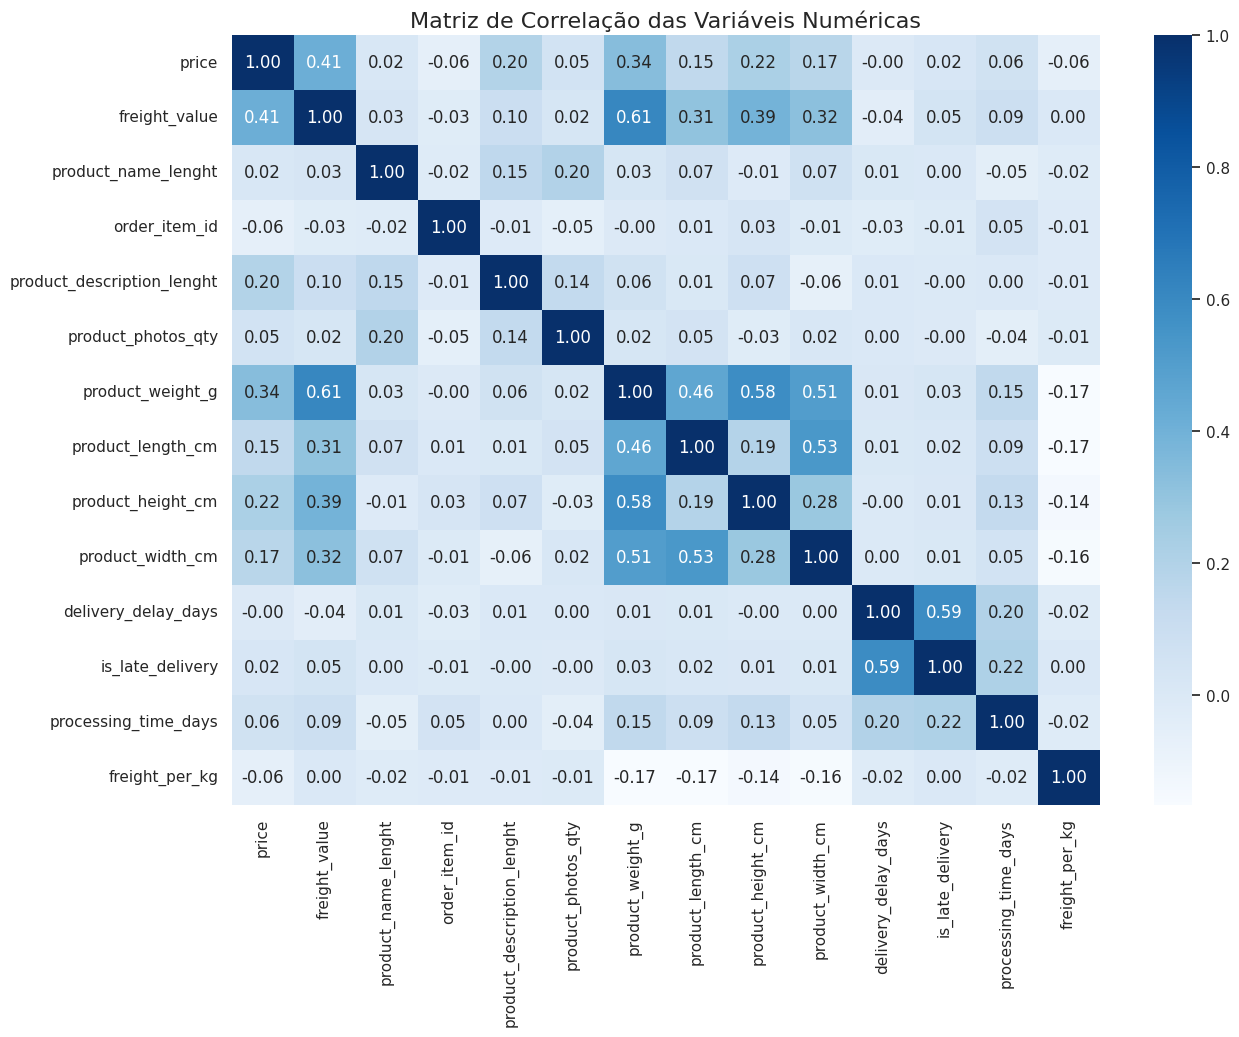

In [27]:
colunas = [
    "price",
    "freight_value",
    "product_name_lenght",
    "order_item_id",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "delivery_delay_days",
    "is_late_delivery",
    "processing_time_days",
    "freight_per_kg"
]

# Criação da matriz de correlação
corr_matrix = df[colunas].corr()

# Heatmap para melhor visualização do resultado
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()

Corelações observadas

1.  Produtos mais pesados possuem frete maior
2.  Produtos maiores causam mais atraso
3. O tempo de processamento afeta o atraso final
4. O frete por quilo está coerente com o peso e preço

### Seleção por baixa variância

Descobrir variáveis que nunca mudam e portanto não servem para gerar insights

/tmp/ipython-input-3991956539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


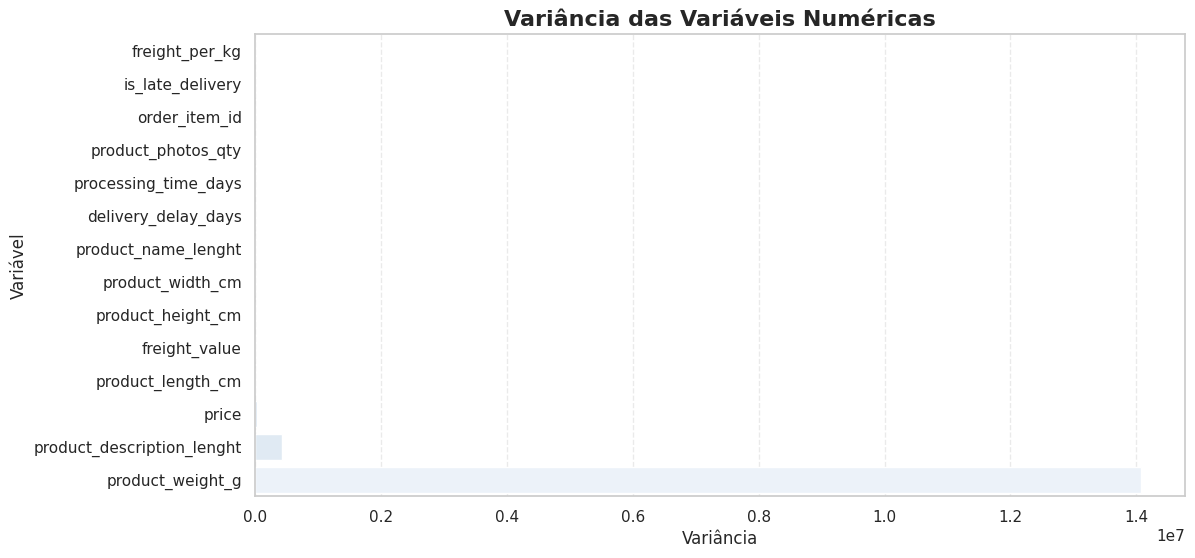

freight_per_kg                1.027132e-02
is_late_delivery              6.033260e-02
order_item_id                 4.971955e-01
product_photos_qty            2.989649e+00
processing_time_days          1.352505e+01
delivery_delay_days           1.032278e+02
product_name_lenght           1.324537e+02
product_width_cm              1.370467e+02
product_height_cm             1.807000e+02
freight_value                 2.498402e+02
product_length_cm             2.609055e+02
price                         3.372112e+04
product_description_lenght    4.279327e+05
product_weight_g              1.407229e+07
dtype: float64


In [28]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(df[colunas])

variances = pd.Series(selector.variances_, index=colunas)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=variances.sort_values(),
    y=variances.sort_values().index,
    palette="Blues_r"
)

# Barplot para melhor visualização da variância
plt.title("Variância das Variáveis Numéricas", fontsize=16, fontweight="bold")
plt.xlabel("Variância")
plt.ylabel("Variável")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()

print(variances.sort_values())

Variâncias e padrões identificados

1. Coluna "order_item_id" não possui variância e portanto não tem poder explicativo
2. Coluna "is_late_delivery" Não possui variância mas signific que a maioria dos pedidos não atrasaram
3. Coluna "freight_per_kg" não possui variância mas indica que não há inconsistências e nem problemas logísticos
4. grande variedade de peso de produtos

### Seleção por Relevância Lógica

Excluímos da normalização e padronização a coluna "order_items_id" e colunas object, pois, ou não fazem sentido em análise, pois não tem variância e correlação válida ou não são usados por conta do seu tipo.


## Normalização e padronização (MinMax, Z-Score)

### Normalização com MinMax

In [29]:
colunas = [
    "price",
    "freight_value",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "processing_time_days",
    "delivery_delay_days",
    "freight_per_kg"
]

minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[colunas] = minmax_scaler.fit_transform(df[colunas])

Ao normalizar tudo para a mesma escala, conseguimos visualizar e interpretar padrões logísticos com mais clareza

In [30]:
z_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[colunas] = z_scaler.fit_transform(df[colunas])

df_zscore.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_approved_at,...,order_status_canceled,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable,delivery_delay_days,is_late_delivery,processing_time_days,freight_per_kg
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,-0.336289,-0.423901,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,...,False,True,False,False,False,False,0.298245,0,0.870061,-0.188452
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,0.649372,-0.003816,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,...,False,True,False,False,False,False,0.888790,0,1.413888,-0.383640
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,0.426646,-0.134144,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,...,False,True,False,False,False,False,-0.193876,0,-0.489506,-0.332384
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,-0.586298,-0.455534,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,...,False,True,False,False,False,False,0.593517,0,-0.217592,0.240802
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,0.431547,-0.117062,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,...,False,True,False,False,False,False,-0.390724,0,2.229628,-0.342465


Permite identificar produtos com medidas irregulares, fretes desproporcionais, tempos de processamento muito altos ou atrasos incomuns.

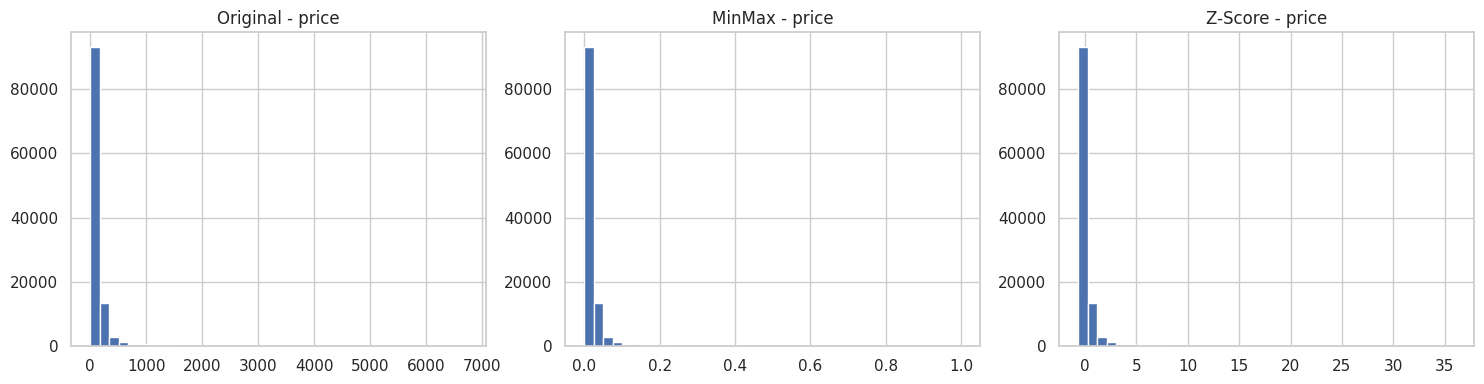

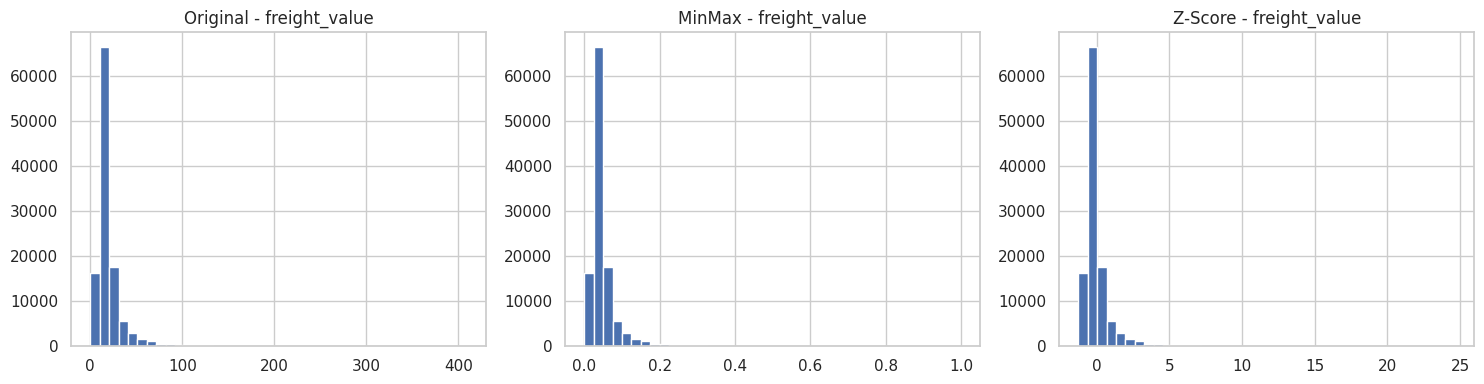

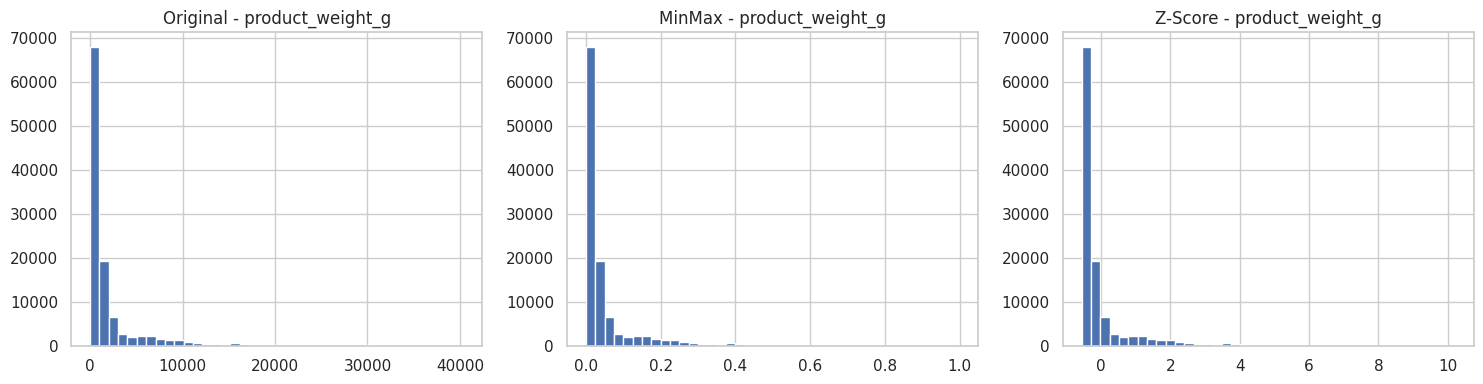

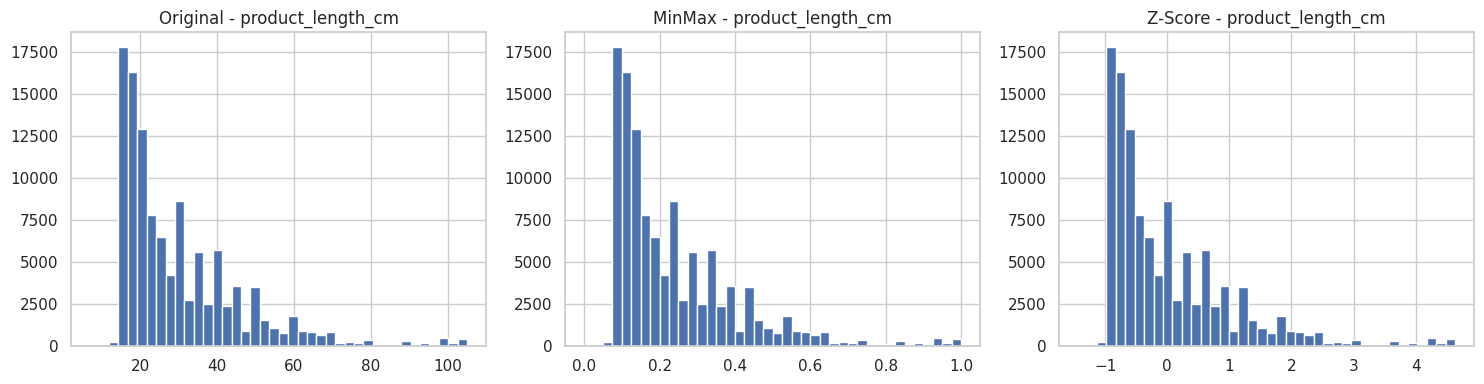

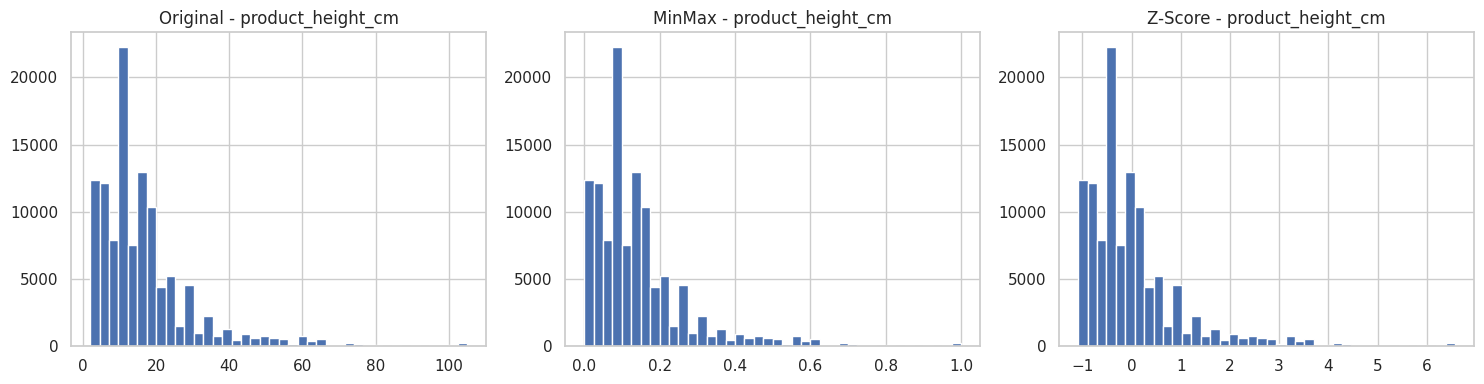

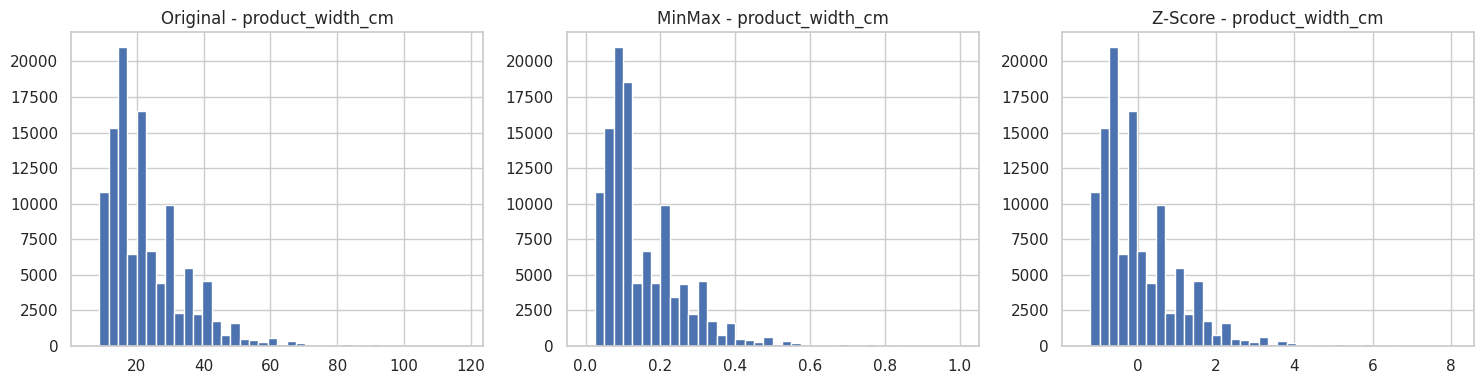

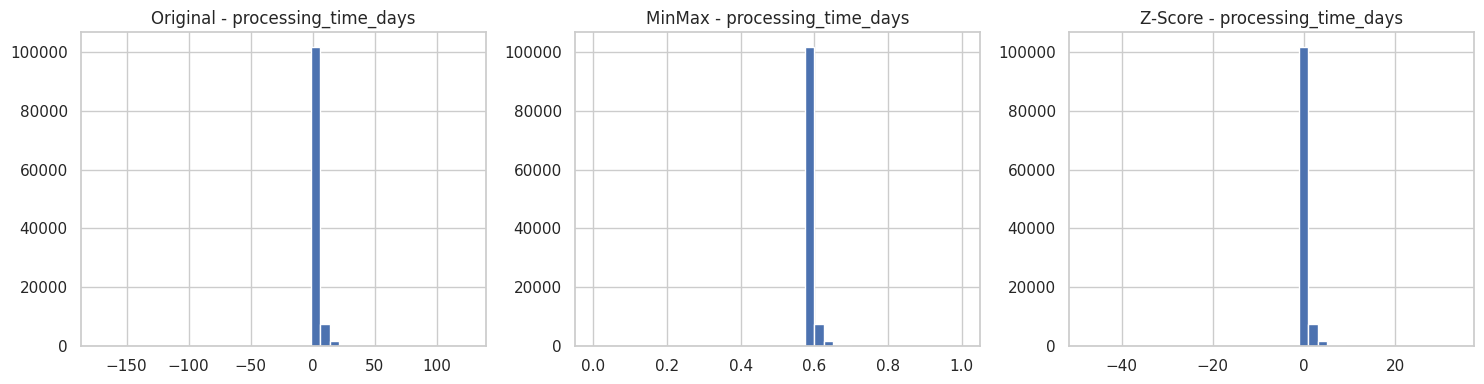

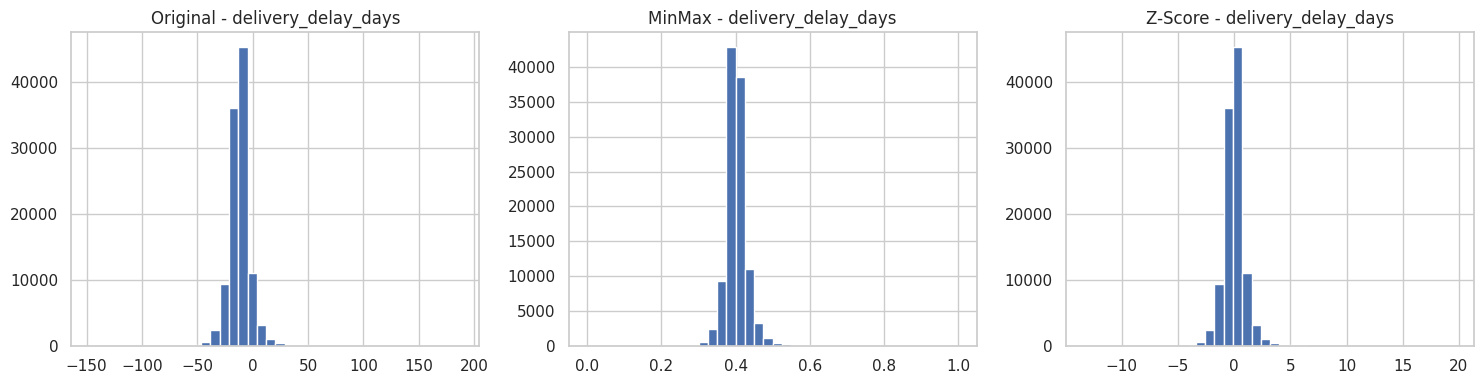

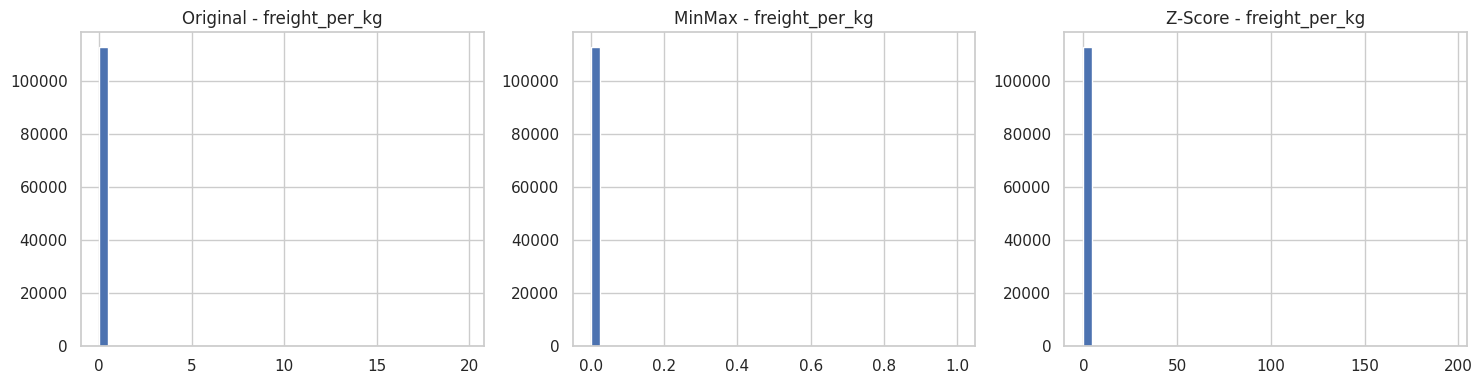

In [31]:
for col in colunas:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    axes[0].hist(df[col], bins=40)
    axes[0].set_title(f"Original - {col}")

    axes[1].hist(df_minmax[col], bins=40)
    axes[1].set_title(f"MinMax - {col}")

    axes[2].hist(df_zscore[col], bins=40)
    axes[2].set_title(f"Z-Score - {col}")

    plt.tight_layout()
    plt.show()

Comparação das três versões,

MinMax deixa tudo entre 0 e 1

Z-Score centraliza os valores e deixa os outliers mais visíveis

## Gráficos + Insights

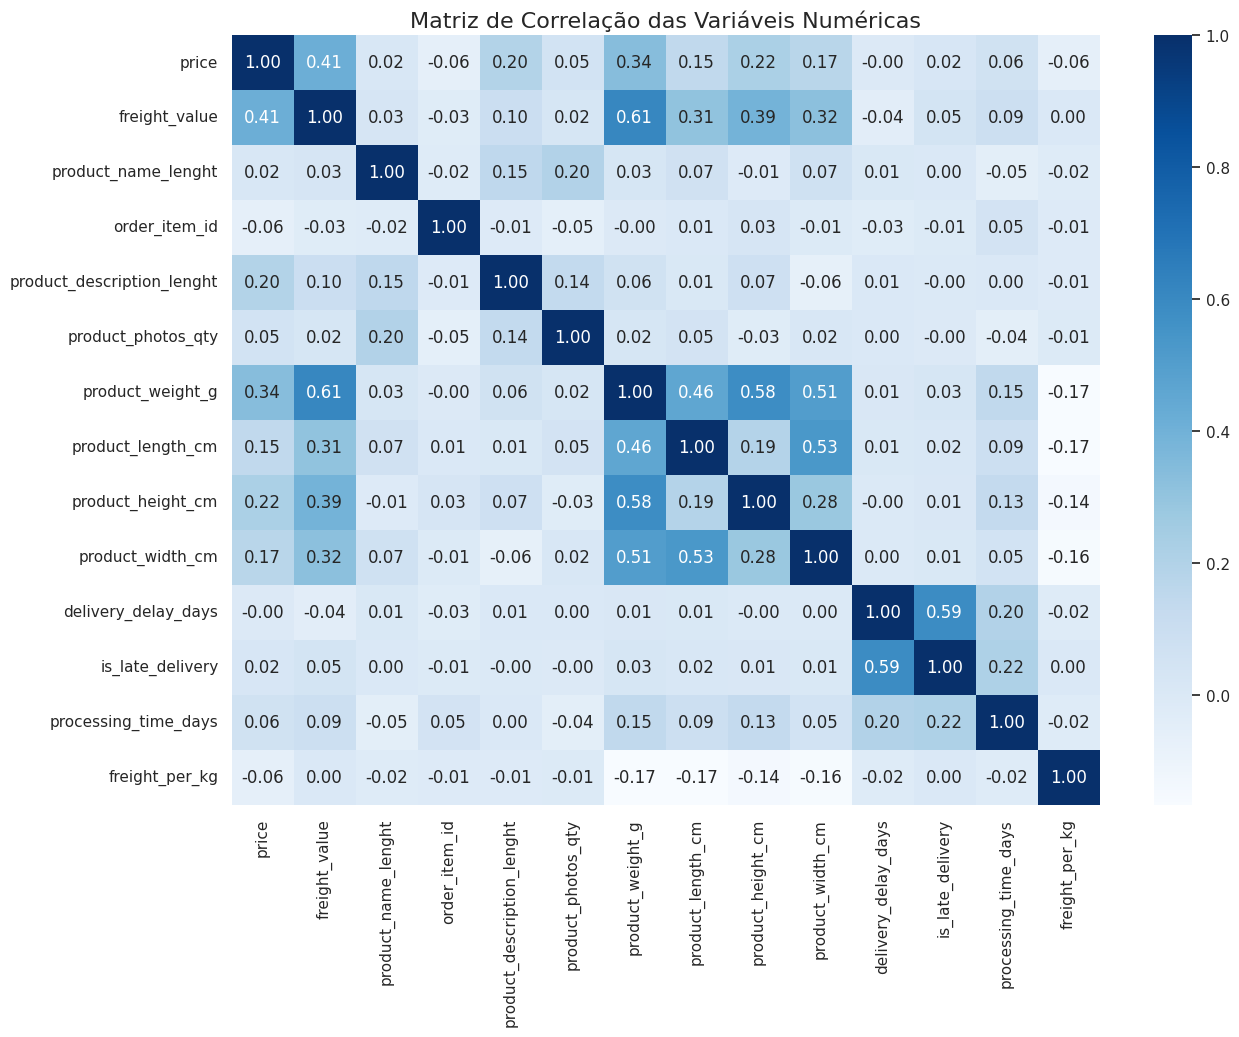

In [32]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()


O heatmap mostra expõe que o peso, as dimensões e o frete têm uma forte relação entre eles, ou seja, produtos maiores significam fretes mais caros

Também fica visível que o atraso tem uma relação considerável com tempo de processamento portanto sugere que parte dos atrasos começa com o próprio vendedor

/tmp/ipython-input-246340704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


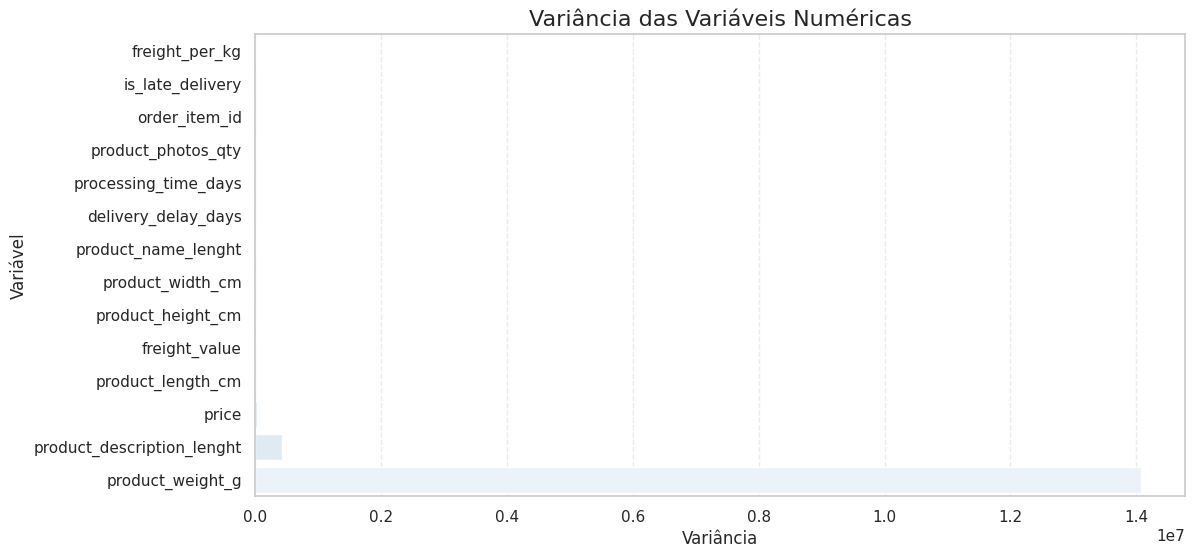

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=variances.sort_values(),
    y=variances.sort_values().index,
    palette="Blues_r"
)
plt.title("Variância das Variáveis Numéricas", fontsize=16)
plt.xlabel("Variância")
plt.ylabel("Variável")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


A análise de variância mostra que a coluna "order_item_id" não tem poder explicativo, pois quase não varia

Já as colunas de peso, dimensões e frete apresentam alta variância expondo que impactam na logística

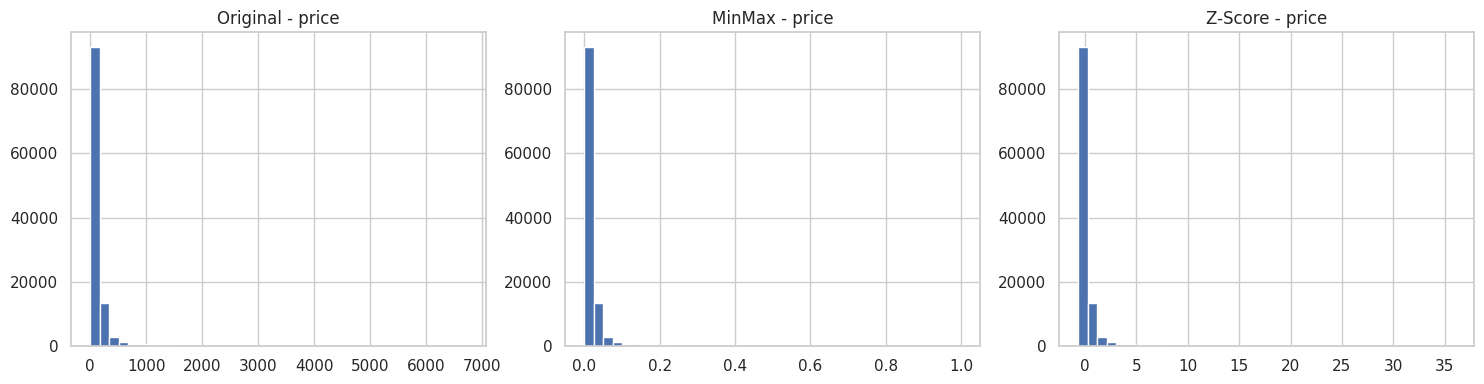

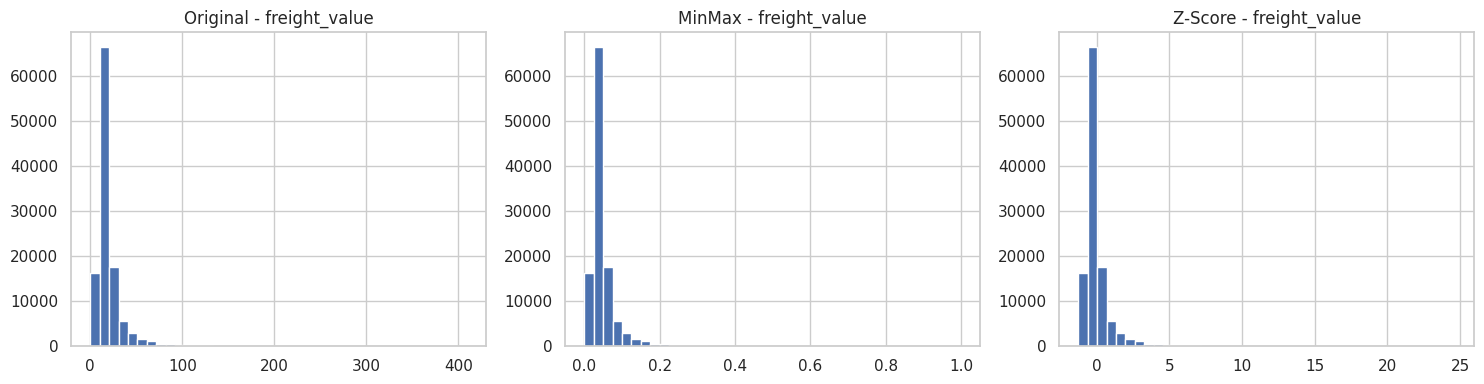

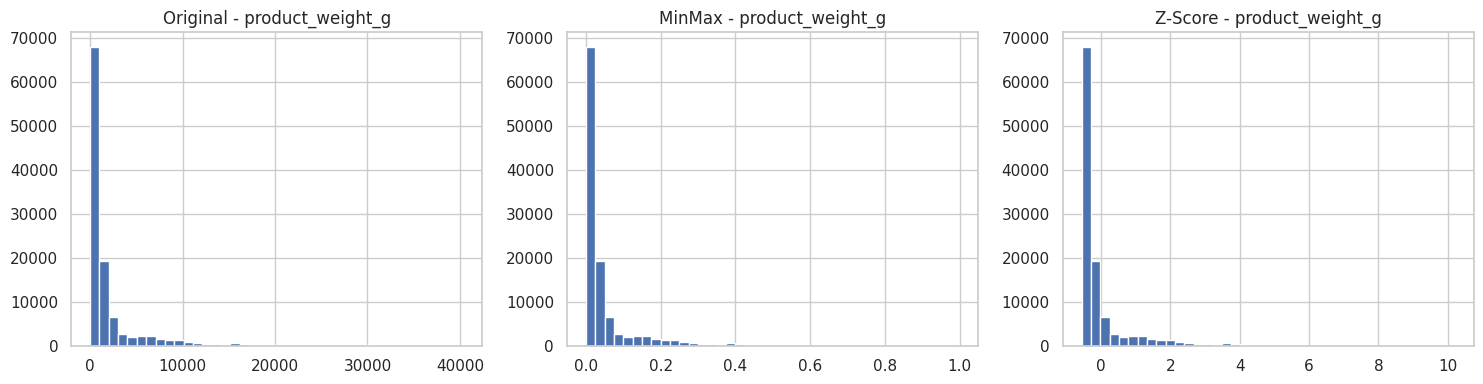

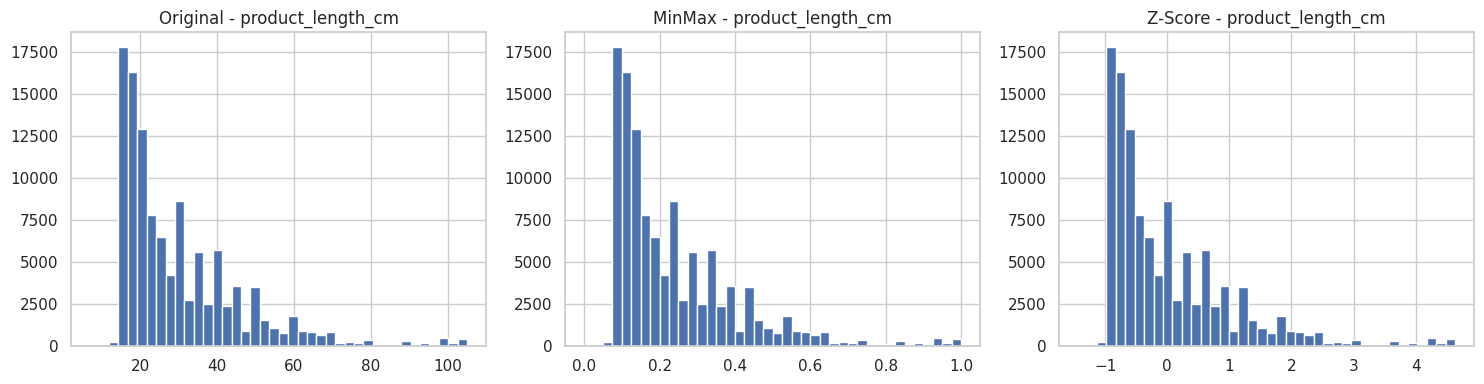

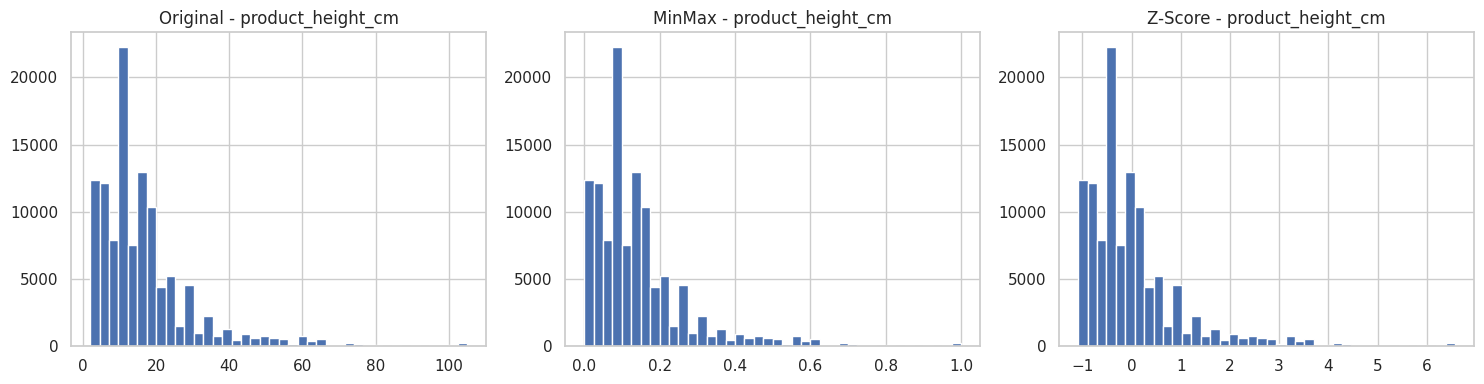

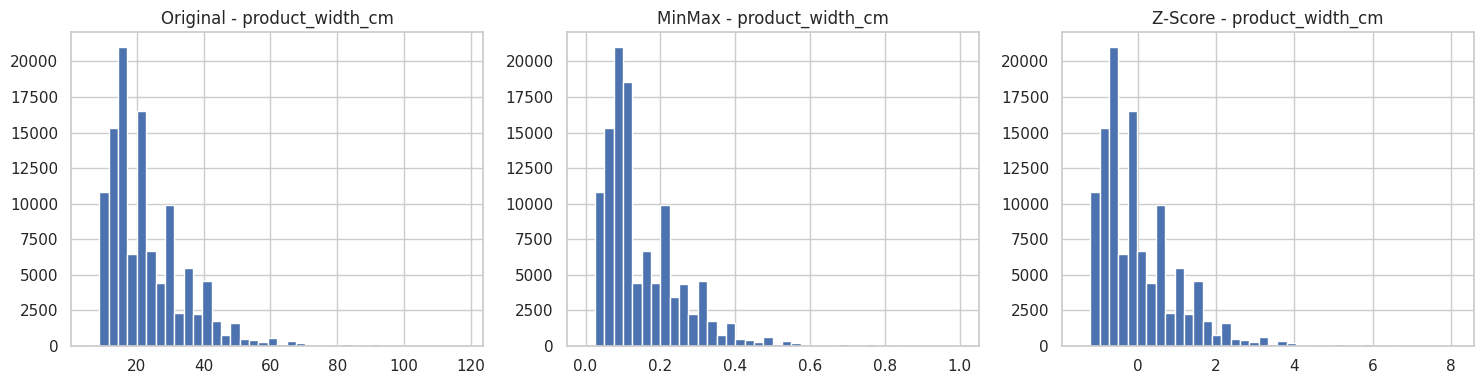

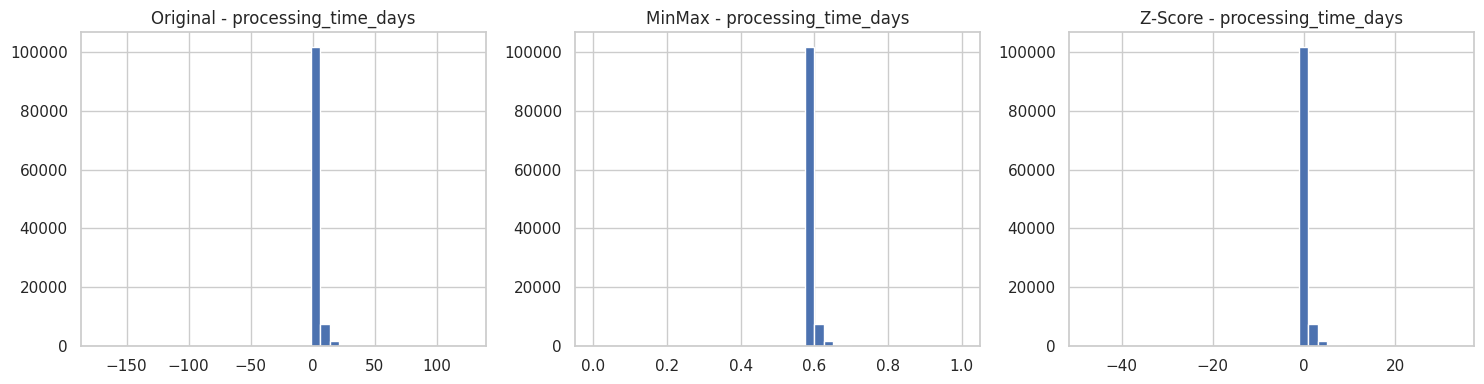

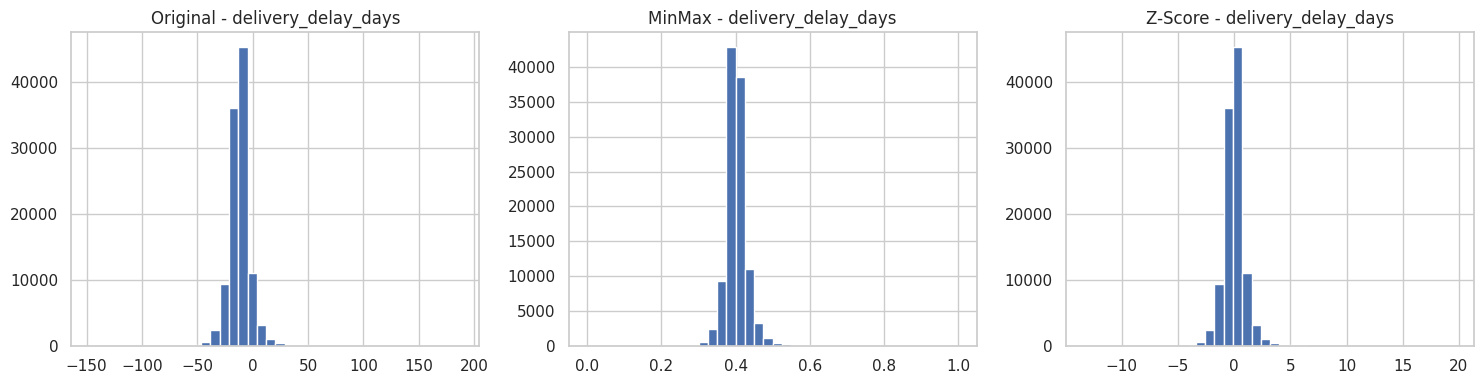

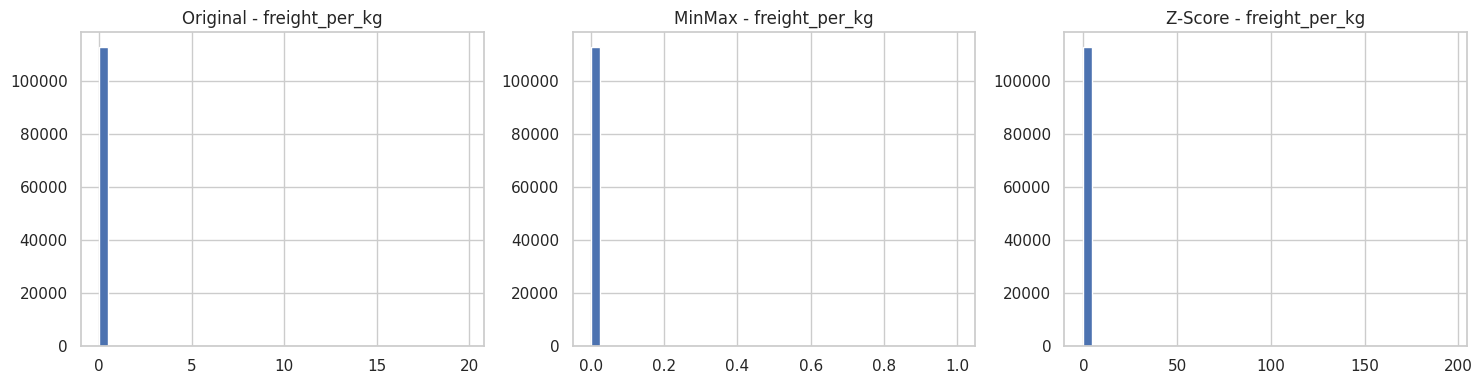

In [34]:
for col in colunas:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    axes[0].hist(df[col], bins=40)
    axes[0].set_title(f"Original - {col}")

    axes[1].hist(df_minmax[col], bins=40)
    axes[1].set_title(f"MinMax - {col}")

    axes[2].hist(df_zscore[col], bins=40)
    axes[2].set_title(f"Z-Score - {col}")

    plt.tight_layout()
    plt.show()


Os histogramas mostram que mesmo com as transformações a  distribuição se mantém

Portanto apenas deixa melhor de se comparar atributos e não muda o reusltado final


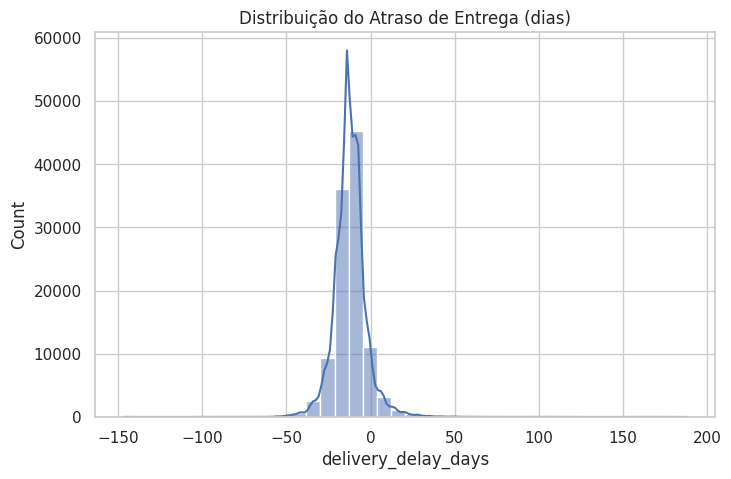

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df["delivery_delay_days"], bins=40, kde=True)
plt.title("Distribuição do Atraso de Entrega (dias)")
plt.show()


Através do gráfico é possível inferir que existem pouquíssimos atrasos

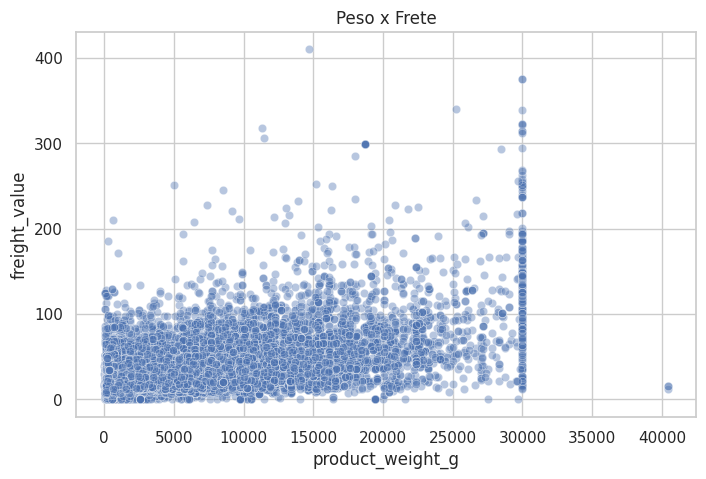

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="product_weight_g", y="freight_value", data=df, alpha=0.4)
plt.title("Peso x Frete")
plt.show()


O gráfico mostra que geralmente quanto maior o peso maior o frete. Existndo algumas exceções

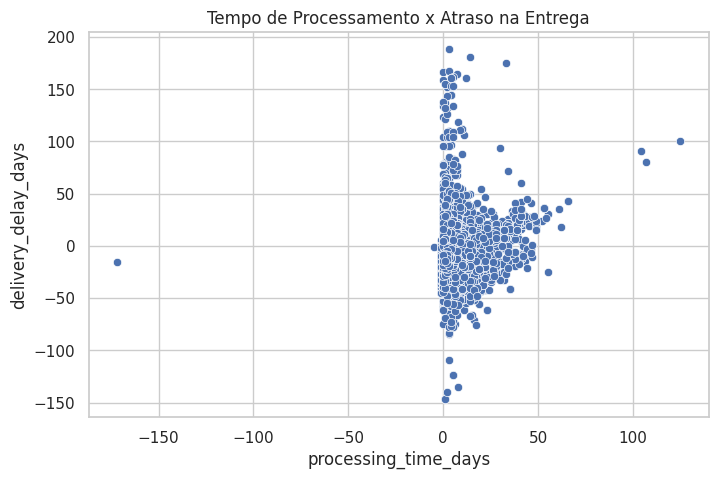

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="processing_time_days", y="delivery_delay_days", data=df)
plt.title("Tempo de Processamento x Atraso na Entrega")
plt.show()


O gráfico mostra que quando o processamento demora o atraso na entrega geralmente é maior também

## Exportação

### Dataset tratado

In [38]:
df.to_csv("dataset_tratado.csv", index=False)